# Credit Card Fraud Detection
Credit card fraud detection is an important use case in finance. The goal of this min-project is to build a robust model that will identify fradulent transcation records. Technically this is a binary classification problem and has certain unique problem aspects (such as data imbalance) that will be dealt here. This dataset is sourced from MLG-ULB (http://mlg.ulb.ac.be) - this is a popular dataset used in many fraud detection pet projects. 

In this mini project, I ingest the data, define evaluation metrics and try few models (Naive Bayes, Random Forest and LinearSVC).

In [64]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import average_precision_score

In [44]:
data = pd.read_csv(r"C:\Users\HP\Documents\DataScience\Python Scripts\Credit Card\ULB\creditcard.csv")

## A look at the data
Initial analyis of data is done. There are some duplicates in 'value' i.e duplicate documents. 
SubcatId distributed is skewed with subcatId 27 having dominance. Though this data has imbalance, this represents the natural phenomenon and hence is not manipulated for this project.
Dataset has about 97k records.

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


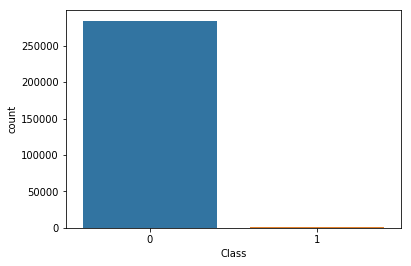

In [4]:
ax = sns.countplot(x="Class", data=data)
plt.show()

In [5]:
Imb_Q = data.loc[data.Class == 0, "Class"].count()/len(data.Class)
Imb_Q

0.99827251436937992

### Data Imbalance:
As see in above plot, this data is heavly imbalanced. About 99.8% of the records are negative i.e non-fradulent records. Such heavy class imbalance needs to be handled with care as usual evaluation metrics such as accuracy don't hold good. Use case specific metrics such as Recall, Precision, True-Negative-Rate etc can be used as evaluation metrics. 

Given the nature of his dataset i.e highly imbalanced and huge significance associated with finding a fradulent transactions, I have chosen Recall (primary metric) and precision, f1-score as secondary metrics. 

While building classification model, I will leverage 'class_weight' parameter in Scikit-Learn to overcame the class imbalance. 

#### Missing values
There are no missing values in this dataset as seen below. 

In [6]:
data.isnull().any().any()

False

### Analyze the Data
For later. 
Correleration - between predictors and target. 
Multicollinearity - among predictors. 

## Model 
Naive Bayes, RandomForest and SVC have been tried.
Gridsearch is used for RF and SVC - but lack of suitability of gridsearch has been illustrated for SVC (the same will be shown for RF as well in next version).
Precision-Recall curve has been produced for SVC model. 

In [7]:
X = data

In [8]:
y = data['Class']
del X['Time']
del X['Class']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 5)

In [10]:
X_train.shape

(199364, 29)

In [11]:
y_train.shape

(199364,)

### Naivebayes 
GaussianNB provides poor results i.e extremely low precision, recall and f1-score for the positive class (i.e Fraud cases)
Higher values for these for the negative cases does not matter as it is critical to get higher scores for the positive class.
Interestingly, use of priors to adjust the weight as well shows only worse results. 

In [14]:
gnb=GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

print('accuracy %s' % classification_report(y_pred, y_test))

accuracy               precision    recall  f1-score   support

           0       0.98      1.00      0.99     83492
           1       0.82      0.06      0.12      1951

   micro avg       0.98      0.98      0.98     85443
   macro avg       0.90      0.53      0.55     85443
weighted avg       0.97      0.98      0.97     85443



In [12]:
gnb=GaussianNB(priors=[.02, .98])
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

print('accuracy %s' % classification_report(y_pred, y_test))

accuracy               precision    recall  f1-score   support

           0       0.97      1.00      0.99     82903
           1       0.86      0.05      0.10      2540

   micro avg       0.97      0.97      0.97     85443
   macro avg       0.92      0.53      0.54     85443
weighted avg       0.97      0.97      0.96     85443



###  RandomForest 

Randomforest(RF) is an important classification model which is an ensemble of Decision Trees. Below, I have used RF in two modes
A: Without any handling for class imbalance
B: By handling imbalance, leveraging class_weight parameter in scikit-learn

Interestingly, performance (specifically on recall that I am focussed on for this usecase) of B (i.e using 'balanced') is slightly less than A. I have tried LinearSVC as well (below) but RF (A) performs is better among the two - better Recall, Precision and f1-score. 
Note: Precision-Recall curve has been plotted for LinearSVC model - the same can be done for RF as well. 

#### Randomforest in GridsearchCV with n_estimators & max_depth in random_grid; NO special handing for imbalance.
class_weight NOT assigned. 

In [37]:
model = Pipeline([('clf', RandomForestClassifier(max_features='auto',bootstrap=False,random_state =42))])
random_grid = {'clf__n_estimators': (100, 200), 'clf__max_depth': (50, 100)}
gs_clf_rfc = GridSearchCV(model, random_grid,cv=2)
gs_clf_rfc.fit(X_train, y_train)
print(gs_clf_rfc.best_params_)
model = gs_clf_rfc.best_estimator_
y_pred = model.predict(X_test)
print('Classifiction Report %s' % classification_report(y_pred, y_test))

{'clf__max_depth': 50, 'clf__n_estimators': 200}
Classifiction Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85322
           1       0.79      0.97      0.87       121

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.90      0.98      0.93     85443
weighted avg       1.00      1.00      1.00     85443



#### Randomforest with class_weight = 'balanced'

In [45]:
model = RandomForestClassifier(max_features='auto',bootstrap=False,class_weight = 'balanced', n_estimators = 200, random_state =42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Classifiction Report %s' % classification_report(y_pred, y_test))

Classifiction Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85327
           1       0.76      0.97      0.86       116

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.88      0.99      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [47]:
model.feature_importances_

array([ 0.00760462,  0.0213011 ,  0.04293572,  0.12116012,  0.00993065,
        0.00653447,  0.04024461,  0.0104868 ,  0.0184757 ,  0.15597324,
        0.08686782,  0.09850065,  0.00709177,  0.15578835,  0.00583045,
        0.0322985 ,  0.0721186 ,  0.01656929,  0.01412275,  0.00611949,
        0.01155878,  0.00468756,  0.00739704,  0.00422905,  0.00554411,
        0.007218  ,  0.01083082,  0.00686064,  0.01171931])

### SVC
SVM Classification (SVC) is used below after feature scaling. 
A: Without any handling for class imbalance
B: By handling imbalance, leveraging class_weight parameter in scikit-learn

Interestingly, performance (specifically on recall that I am focussed on for this usecase) of B (i.e using 'balanced') is slightly less than A. 

#### SVC after feature scaling and Test/Train split

In [45]:
colnames = list(data)

In [46]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns= colnames)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [47]:
scaled_X = scaled_data

In [48]:
scaled_y = scaled_data['Class']

In [49]:
del scaled_X['Time']
del scaled_X['Class']

In [50]:
X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(scaled_X, scaled_y, test_size=0.3, random_state = 5)

#### SVC without class weigth balance

In [38]:
model_svc = LinearSVC()
model_svc.fit(X_s_train, y_s_train)
y_s_pred = model_svc.predict(X_s_test)
print('accuracy %s' % classification_report(y_s_pred, y_s_test))

accuracy               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85352
         1.0       0.55      0.89      0.68        91

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.77      0.94      0.84     85443
weighted avg       1.00      1.00      1.00     85443



#### SVC with class weight balance

In [37]:
model_svc = LinearSVC(C=1.0, class_weight = 'balanced')
model_svc.fit(X_s_train, y_s_train)
y_s_pred = model_svc.predict(X_s_test)
print('accuracy %s' % classification_report(y_s_pred, y_s_test))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


accuracy               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85074
         1.0       0.86      0.34      0.49       369

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.93      0.67      0.74     85443
weighted avg       1.00      1.00      1.00     85443



#### SVC with custom class weight
As seen above, use of class_weight = 'balanced' produced results that are worse than the option where no class_weight was configured - this is a point of concern and needs further analysis.

To overcome this predicament, I have used (below) another direct way of seeding the class weights i.e using a dict. 
Have tried to find the best C and class_weight values by manual experimentation using a range of values for both.

As can be seen, best param found by this approach is C=0.1 and class_weight of 0.05/0.95 - this produces excellent recall (0.91), Precision (0.76), f1-score (0.83) for Class '1' which is much superior to corresponding values of recall (0.89), Precison (0.55) and f1-score (0.68) of option using default C & class_weight values.

In [43]:
model_svc = LinearSVC(C=1.0, class_weight = {0: 0.05, 1: 0.95})
model_svc.fit(X_s_train, y_s_train)
y_s_pred = model_svc.predict(X_s_test)
print(classification_report(y_s_pred, y_s_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85300
         1.0       0.81      0.84      0.82       143

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.91      0.92      0.91     85443
weighted avg       1.00      1.00      1.00     85443



C = 0.1 Class weight: 0.05/0.95

In [48]:
model_svc = LinearSVC(C=0.1, class_weight = {0: 0.05, 1: 0.95})
model_svc.fit(X_s_train, y_s_train)
y_s_pred = model_svc.predict(X_s_test)
print(classification_report(y_s_pred, y_s_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85320
         1.0       0.76      0.91      0.83       123

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.88      0.96      0.91     85443
weighted avg       1.00      1.00      1.00     85443



C = 0.1, Class weight: 0.08/0.92

In [25]:
model_svc = LinearSVC(C=0.1, class_weight = {0: 0.08, 1: 0.92})
model_svc.fit(X_s_train, y_s_train)
y_s_pred = model_svc.predict(X_s_test)
print(classification_report(y_s_pred, y_s_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85321
         1.0       0.75      0.91      0.82       122

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.87      0.95      0.91     85443
weighted avg       1.00      1.00      1.00     85443



C = 0.08, Class weight: 0.05/0.95

In [27]:
model_svc = LinearSVC(C=0.08, class_weight = {0: 0.05, 1: 0.95})
model_svc.fit(X_s_train, y_s_train)
y_s_pred = model_svc.predict(X_s_test)
print(classification_report(y_s_pred, y_s_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85321
         1.0       0.75      0.91      0.82       122

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.87      0.95      0.91     85443
weighted avg       1.00      1.00      1.00     85443



C = 0.2, Class weight: 0.08/0.92

In [26]:
model_svc = LinearSVC(C=0.2, class_weight = {0: 0.08, 1: 0.92})
model_svc.fit(X_s_train, y_s_train)
y_s_pred = model_svc.predict(X_s_test)
print(classification_report(y_s_pred, y_s_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85318
         1.0       0.76      0.90      0.83       125

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.88      0.95      0.91     85443
weighted avg       1.00      1.00      1.00     85443



C = 0.01, Class weight: 0.05/0.95

In [28]:
model_svc = LinearSVC(C=0.01, class_weight = {0: 0.05, 1: 0.95})
model_svc.fit(X_s_train, y_s_train)
y_s_pred = model_svc.predict(X_s_test)
print(classification_report(y_s_pred, y_s_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85370
         1.0       0.43      0.86      0.57        73

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.71      0.93      0.78     85443
weighted avg       1.00      1.00      1.00     85443



#### 
C = 0.3  Class weight: 0.05/0.95

In [24]:
model_svc = LinearSVC(C=0.3, class_weight = {0: 0.05, 1: 0.95})
model_svc.fit(X_s_train, y_s_train)
y_s_pred = model_svc.predict(X_s_test)
print(classification_report(y_s_pred, y_s_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85311
         1.0       0.79      0.89      0.84       132

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.90      0.94      0.92     85443
weighted avg       1.00      1.00      1.00     85443



#### Using GridsearchCV to find best fit a chosen scorer

In previous cells, I have demonstrated way to finding better fit params (C & class_weight) using experimentation (manual). However, there is an easy way to do it using GridSearchCV - GridSearchCV can be used to find the best fit for a given score (say 'recall' or 'precision' etc). I have shown this in below cells. 

BUT, I did NOT find this as a great technique. This is because this method focusses on the overall (i.e average) value of a chosen score (say 'recall') which is NOT of significance in case of problems with extrement data imbalance as this. This behavious is illustrated below - the best params found by GridSearchCV is C=1 and class_weight = {0: 0.05, 1: 0.95}. But this is NOT the optimal param and does not result in the best result (as I have found using manual experimentation in above cells).

BEST PARAMS & RESULTS via manual experimentation: C=0.1, class_weight {0: 0.05, 1: 0.95}
  precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85320
         1.0       0.76      0.91      0.83       123

BEST PARAMS & RESULTS via GridSearchCV: C=0.1, class_weight {0: 0.05, 1: 0.95}
 

In [51]:
clf = LinearSVC()

In [52]:
param_grid = {
    'C': [0.01, 0.1, 1], 
    'class_weight': [{0: 0.05, 1: 0.95},{0: 0.08, 1: 0.92}, {0: 0.1, 1: 0.9} ]
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}


In [53]:
def grid_search_wrapper(refit_score='precision_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=10)
    grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True)
    grid_search.fit(X_s_train, y_s_train)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)
    
    # make the predictions
    #grid_search = grid_search.best_params_
    y_s_pred = grid_search.predict(X_s_test)


    # Classification Report
    print(classification_report(y_s_pred, y_s_test))
    # confusion matrix on the test data.
    #print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(refit_score))
    #print(pd.DataFrame(confusion_matrix(y_test, y_pred), columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    return grid_search

In [54]:
grid_search_clf = grid_search_wrapper(refit_score='recall_score')

Best params for recall_score
{'C': 1, 'class_weight': {0: 0.05, 1: 0.95}}
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85300
         1.0       0.81      0.84      0.82       143

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.91      0.92      0.91     85443
weighted avg       1.00      1.00      1.00     85443



### Precision-Recall Curve
Since this is an imbalanced dataset, the best visual form to evaluate the performance is Precision-Recall-Curve.
I have produced two plots below
A. Visualizaton of relationship between Recall and Precision i.e classic Precision-Recall curve
B. Visualization of relationship between Recall/Precision and Decision-Threshold 

In [57]:
y_scores = grid_search_clf.decision_function(X_s_test)

In [76]:
p, r, thresholds = precision_recall_curve(y_s_test, y_scores)

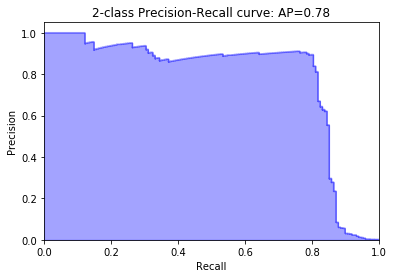

In [71]:
from inspect import signature

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(r, p, color='b', alpha=0.2,
         where='post')
plt.fill_between(r, p, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.show()

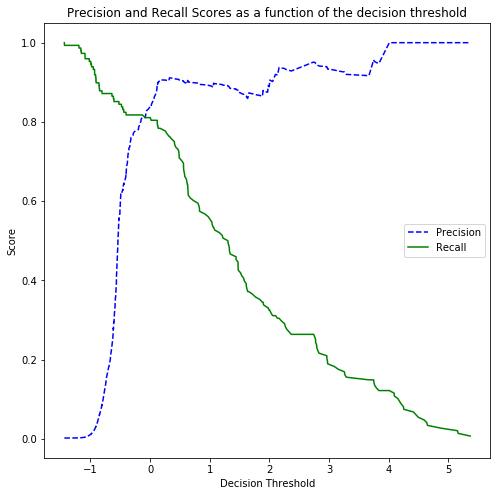

In [74]:
plt.figure(figsize=(8, 8))
plt.title("Precision and Recall Scores as a function of the decision threshold")
plt.plot(thresholds, p[:-1], "b--", label="Precision")
plt.plot(thresholds, r[:-1], "g-", label="Recall")
plt.ylabel("Score")
plt.xlabel("Decision Threshold")
plt.legend(loc='best')
plt.show()